In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
%matplotlib inline

df = pd.read_csv('data.csv')
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


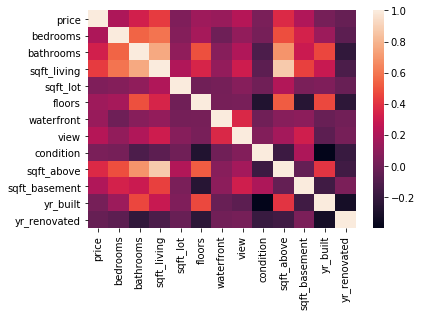

In [5]:
sns.heatmap(df.corr())

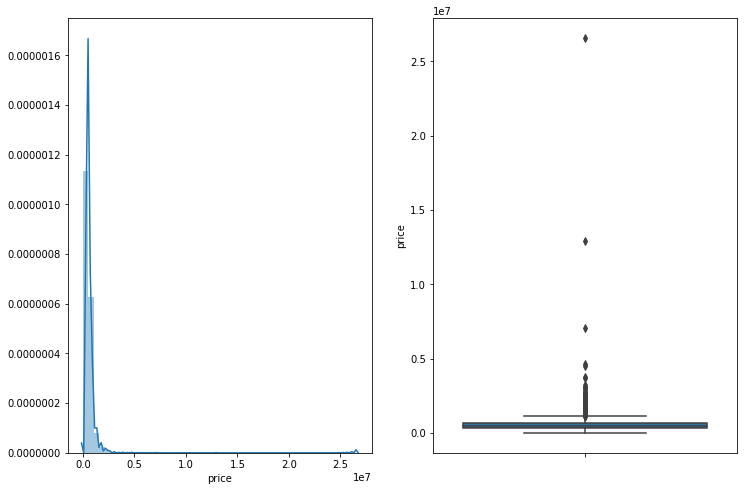

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
sns.distplot(df['price'],ax=axes[0])
sns.boxplot(df['price'],orient = 'v',ax=axes[1])

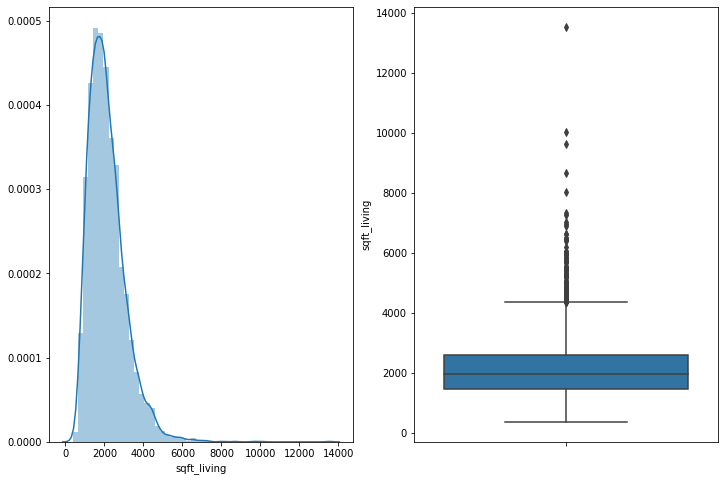

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
sns.distplot(df['sqft_living'],ax=axes[0])
sns.boxplot(df['sqft_living'],orient = 'v',ax=axes[1])

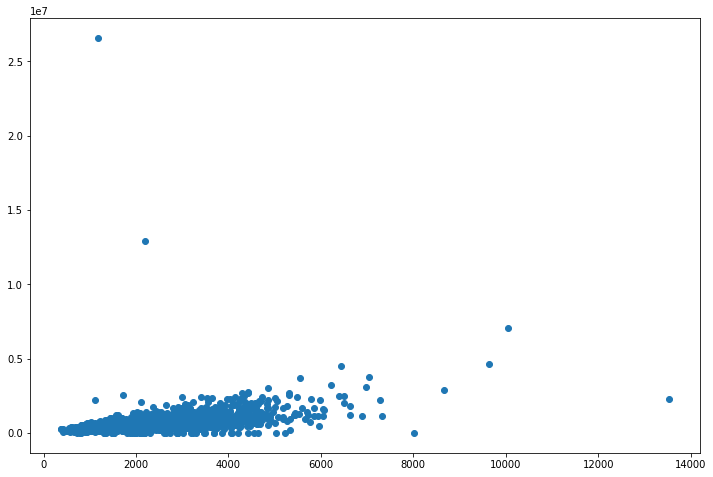

In [8]:
fig = plt.figure(figsize = (12,8))
plt.scatter(data=df,x='sqft_living',y='price')

In [9]:
## Data splitting for Train and Test
x = df['sqft_living']
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

In [10]:
##Data scaling for Normalization
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [11]:
##สร้าง model เเบบ SVR - linear
regressor_li = SVR(kernel = 'linear')
regressor_li.fit(x_train,y_train)
##สร้าง model เเบบ SVR - Radius basis function
regressor_rbf = SVR(kernel = 'rbf')
regressor_rbf.fit(x_train,y_train)

D:\Program ETC\Jupyter\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program ETC\Jupyter\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
predicted_li = sc_y.inverse_transform(regressor_li.predict(x_test))
predicted_li

array([ 495747.3776893 ,  476565.81589576,  682447.9124798 ,
        447154.08781232,  413906.04737017,  617230.60238176,
        379379.23614179,  364033.98670694,  396003.25636287,
        512371.39791038,  627460.76867163,  545619.43835252,
        485517.21139941,  745107.6810054 ,  686284.22483852,
        521322.79341403,  761731.70122649,  653036.18439637,
        678611.6001211 ,  571194.85407725,  715695.95292195,
        649199.87203766,  534110.5012764 ,  604442.89451939,
        633854.62260283,  739992.59786046,  570939.09992   ,
        475287.04510953,  426693.75523254,  371706.61142437,
        335901.02940979,  557128.37542865,  434366.37994996,
        398560.79793534,  523880.3349865 ,  472729.50353705,
        406233.42265277,  448432.85859857,  425414.98444631,
        435645.1507362 ,  715695.95292195,  433087.60916372,
        646642.33046519,  848688.11469053,  669660.20461744,
        509813.85633791,  562243.45857359,  607000.43609186,
        697793.16191464,

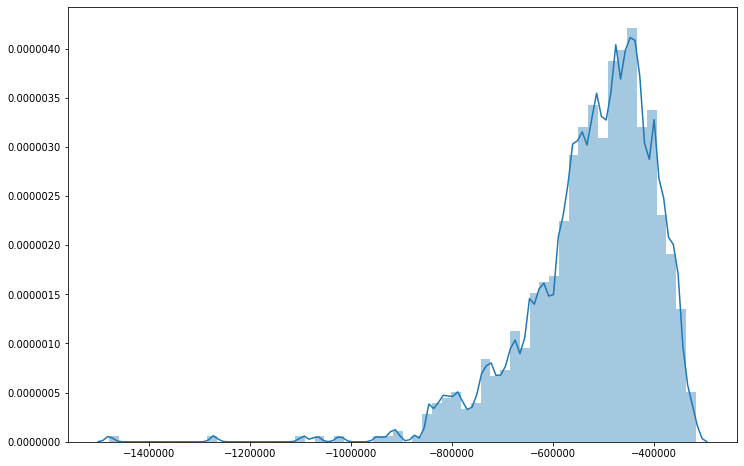

In [13]:
fig = plt.figure(figsize = (12,8))
sns.distplot(y_test-predicted_li,bins=60)

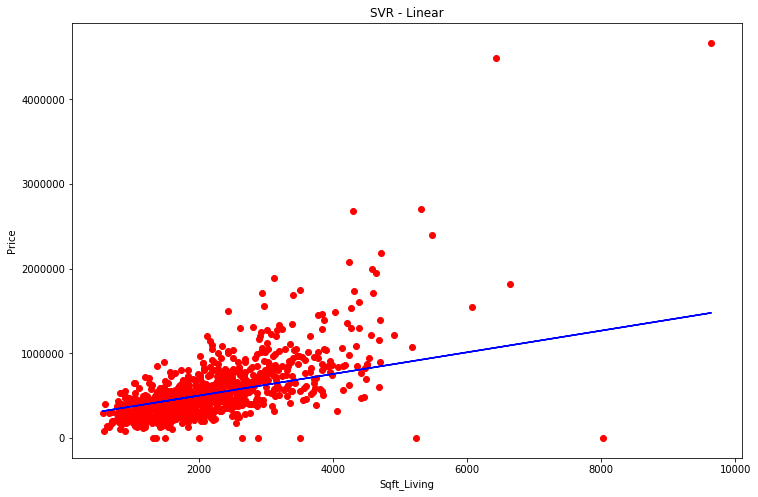

In [14]:
fig = plt.figure(figsize = (12,8))
plt.scatter(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),color='red')
plt.plot(sc_x.inverse_transform(x_test),predicted_li,color='blue')
plt.title('SVR - Linear')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.show()

In [15]:
print('MAE',metrics.mean_absolute_error(sc_y.inverse_transform(y_test),predicted_li))
print('MSE',metrics.mean_squared_error(sc_y.inverse_transform(y_test),predicted_li))
print('RMSE',np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_test),predicted_li)))

MAE 185866.87507531955
MSE 94551975602.55336
RMSE 307493.0496817015


In [16]:
predicted_rbf = sc_y.inverse_transform(regressor_rbf.predict(x_test))
predicted_rbf

array([ 473415.89290523,  460923.89748767,  696512.84564659,
        445633.34814426,  422819.65056646,  614312.98689609,
        391728.67614936,  379383.71405739,  406908.38970499,
        488145.86346812,  625570.6768288 ,  528001.8046464 ,
        466253.50047173,  774754.54585488,  701864.1464967 ,
        497720.23875313,  794568.05595289,  656333.89103256,
        691146.13847136,  561632.70799254,  740689.53210753,
        651422.77971495,  513068.50274921,  600474.18178483,
        632848.23012104,  768950.81051611,  561307.98458336,
        460216.81830777,  432779.75979232,  385230.45367165,
        367110.86233642,  543309.20895907,  438024.87773332,
        409264.97744069,  500647.70983896,  458834.08736358,
        416205.83149883,  446330.09928411,  431851.37105133,
        438846.01889492,  740689.53210753,  437188.91110755,
        648208.11988987,  959170.89942307,  678672.43422136,
        485616.39299313,  550064.56916343,  603250.52796898,
        717643.78811367,

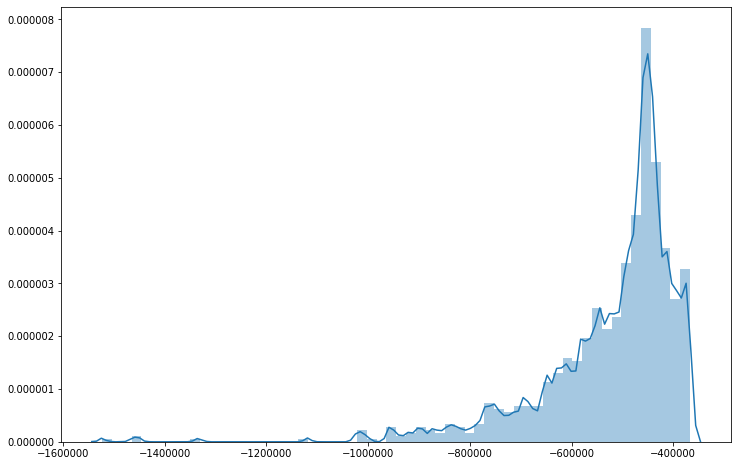

In [17]:
fig = plt.figure(figsize = (12,8))
sns.distplot(y_test-predicted_rbf,bins=60)

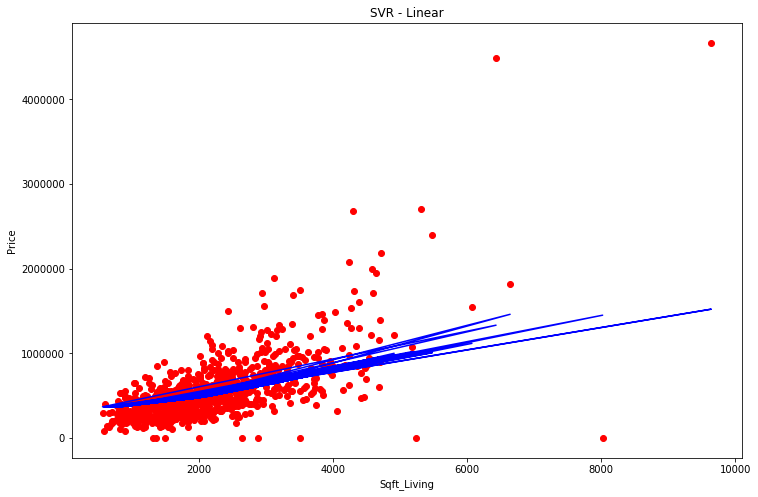

In [18]:
fig = plt.figure(figsize = (12,8))
plt.scatter(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),color='red')
plt.plot(sc_x.inverse_transform(x_test),predicted_rbf,color='blue')
plt.title('SVR - Linear')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.show()

In [19]:
print('MAE',metrics.mean_absolute_error(sc_y.inverse_transform(y_test),predicted_rbf))
print('MSE',metrics.mean_squared_error(sc_y.inverse_transform(y_test),predicted_rbf))
print('RMSE',np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_test),predicted_rbf)))

MAE 183819.20437746044
MSE 90116034334.51498
RMSE 300193.32826449524
